<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>


### Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [18]:
df = pd.read_csv('supermarket_sales.csv')

In [19]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer Type', 'Gender',
       'Product Line', 'Unit Price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time ', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [20]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer Type               object
Gender                      object
Product Line                object
Unit Price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

### Task 2: Dealing With Duplicate Rows and Missing Values

In [22]:
df.duplicated().sum() #Shows how many rows are duplicated

3

In [23]:
df[df.duplicated()==True] #Displays the rows that have duplicates

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
969,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
970,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,2019-03-10,20:46,Ewallet,116.06,4.761905,5.803,8.8
971,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,2019-01-26,15:17,Cash,609.56,4.761905,30.478,5.5


In [24]:
df.drop_duplicates() #Removes the duplicate rows

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,2019-01-28,12:43,Cash,702.63,4.761905,35.1315,4.5
1,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,2019-01-10,14:49,Cash,670.24,4.761905,33.5120,5.1
2,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,2019-03-15,10:12,Credit card,193.16,4.761905,9.6580,5.1
3,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,2019-02-06,10:42,Ewallet,397.68,4.761905,19.8840,7.5
4,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,2019-01-07,12:28,Ewallet,68.12,4.761905,3.4060,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
965,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
966,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
967,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [25]:
df.isna().sum()/len(df) #percentage of missing data

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer Type              0.080247
Gender                     0.000000
Product Line               0.040123
Unit Price                 0.007202
Quantity                   0.020576
Tax 5%                     0.000000
Total                      0.000000
Date                       0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

### Task 3: Univariate Analysis

In [26]:
df.set_index('Date',inplace=True)

In [27]:
df.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-28,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,12:43,Cash,702.63,4.761905,35.1315,4.5
2019-01-10,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,14:49,Cash,670.24,4.761905,33.5120,5.1
2019-03-15,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,10:12,Credit card,193.16,4.761905,9.6580,5.1
2019-02-06,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,10:42,Ewallet,397.68,4.761905,19.8840,7.5
2019-01-07,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,12:28,Ewallet,68.12,4.761905,3.4060,6.8


In [28]:
df.describe()

,Unit Price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,965.000000,952.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,55.646093,5.505252,15.366447,322.695377,307.328930,4.761905,15.366447,6.982099
std,26.564106,2.936763,11.759974,246.959461,235.199487,0.000000,11.759974,1.715738
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.620000,3.000000,5.833875,122.511375,116.677500,4.761905,5.833875,5.500000
50%,55.390000,5.000000,12.066000,253.386000,241.320000,4.761905,12.066000,7.000000
75%,77.950000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

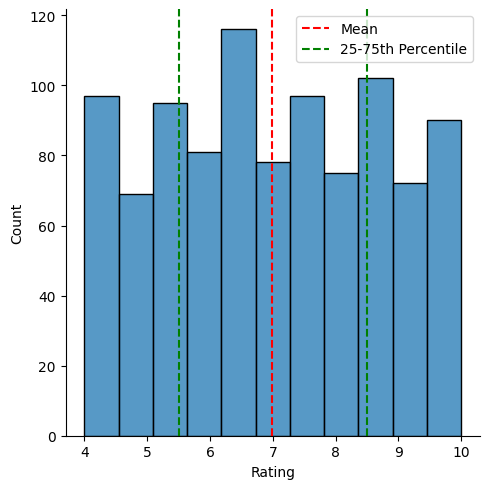

In [29]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), color = 'red', ls = '--', label = 'Mean')
plt.axvline(x=np.percentile(df['Rating'],25), color = 'green', ls = '--', label = '25-75th Percentile')
plt.axvline(x=np.percentile(df['Rating'],75), color = 'green', ls = '--')
plt.legend(loc = 'upper right')


The customer ratings look uniform and do not seem to be skewed in either direction.

**Question 1b:** What does the distribution look like for the other categories?

array([[<AxesSubplot:title={'center':'Unit Price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

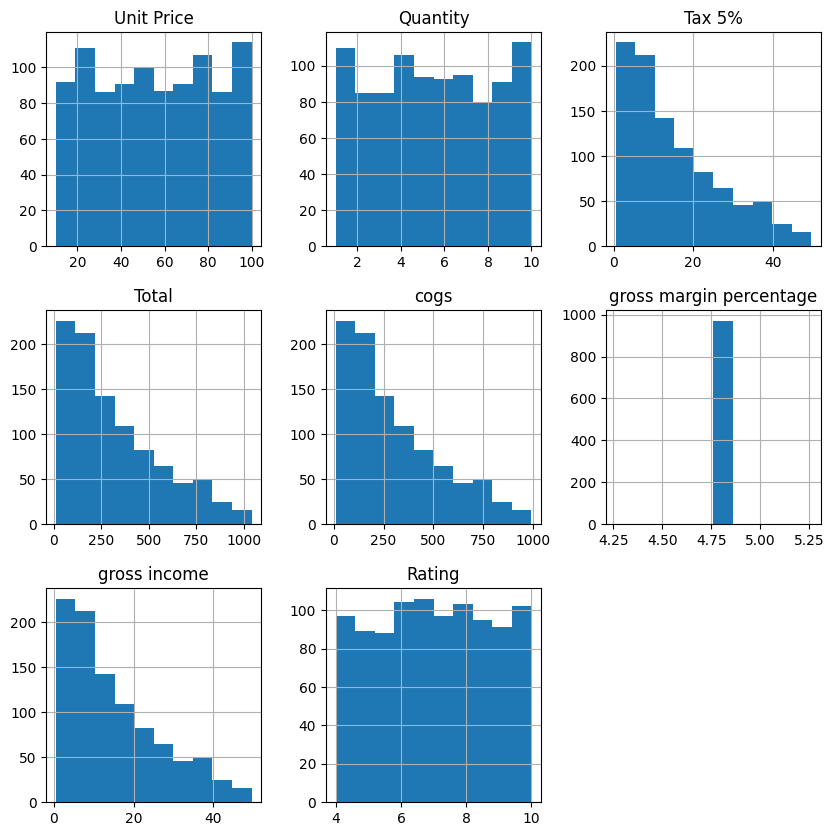

In [30]:
df.hist(figsize = (10,10))

The customer ratings look uniform and  does not seem to be skewed in either direction.

**Question 2:** Do aggregate sales numbers differ by much between branches?

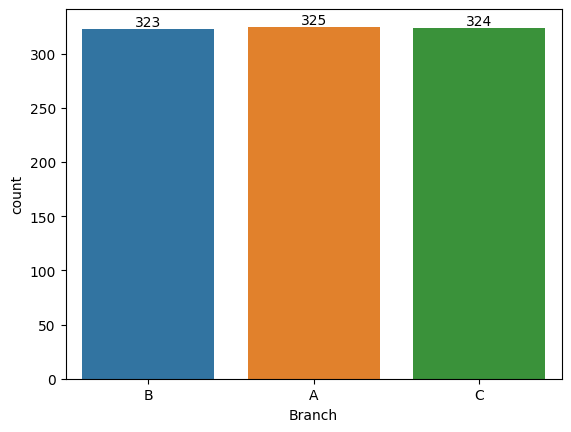

In [31]:
ax = (sns.countplot(x = df['Branch']))

for i in ax.containers:
    ax.bar_label(i,)



The branches all had a simialr amount of sales.

**Question 3:** Which payment method is the most common?

<AxesSubplot:xlabel='Payment', ylabel='count'>

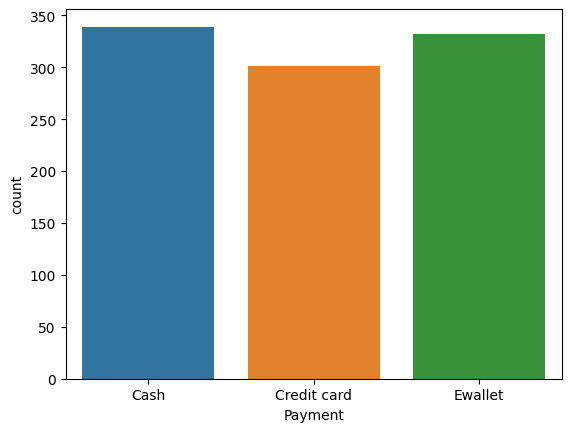

In [32]:
sns.countplot(x = df['Payment'])

Cash is the most common form of payment, followed closely by Ewallet. Credit card payments are the least common.


### Task 4: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

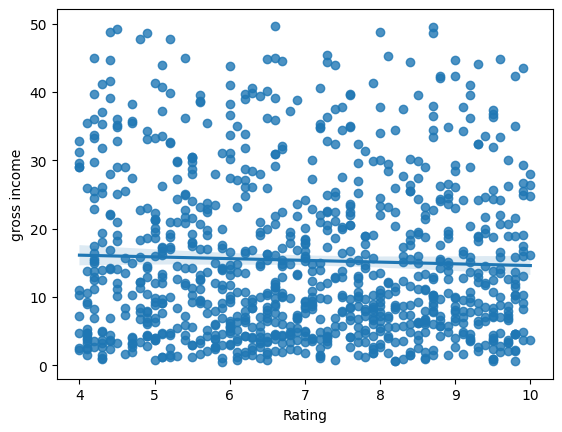

In [33]:
sns.regplot(x = df['Rating'], y = df['gross income'])

There seems to be no replationship between gross income and customer ratings. If there was the trendline would not be straight.

**Question4b:** Is there a large variation in Gross Income in the three branches?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

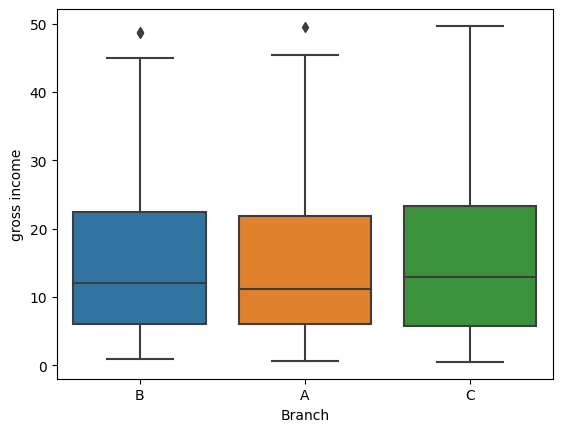

In [34]:
sns.boxplot(x = df['Branch'], y = df['gross income'])

No, there doesnt seem to be a large variation between the gross income at each branch.

**Question 3c:** Is there a relationship between Gender and Gross Income?



<AxesSubplot:xlabel='Gender', ylabel='gross income'>

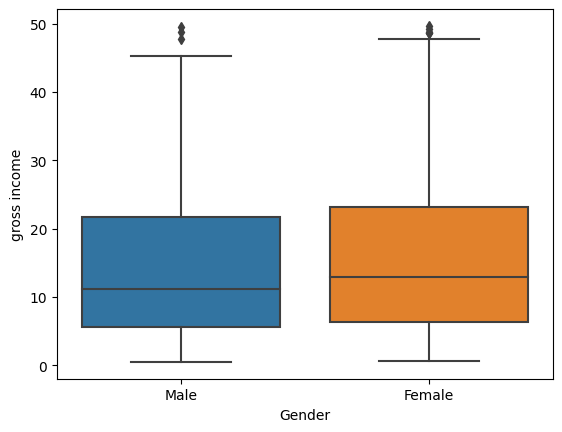

In [35]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

No, on average women and men spend about the same. At the 75th percentile women may spend a bit more than men.

**Question 4:** Is there a noticeable time trend in gross income?

In [36]:
df.groupby(df.index).mean() #aggregates the data for each day

,Unit Price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,53.394545,6.500000,18.561636,389.794364,371.232727,4.761905,18.561636,6.554545
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,60.450000,4.363636,12.933818,271.610182,258.676364,4.761905,12.933818,7.281818
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


<AxesSubplot:xlabel='Date', ylabel='gross income'>

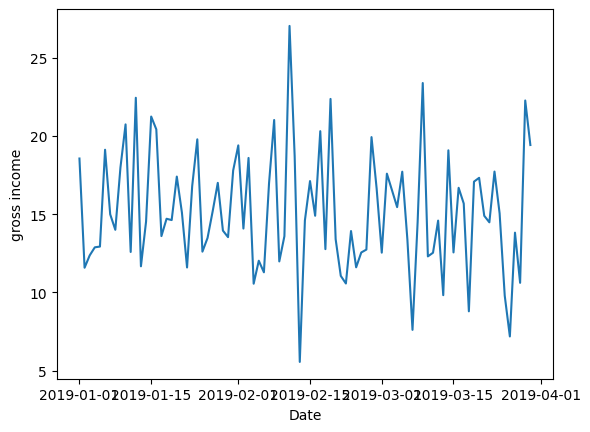

In [37]:
sns.lineplot(x = df.groupby(df.index).mean().index, 
             y = df.groupby(df.index).mean()['gross income'])
                                             

No time trend in this graph. Varies around the same mean. Some days the gross income is quite high and some are very low but no overall trend. 